# I decided to treat this as a classification problem by creating a new
binary
variable affair (did the woman have at least one affair?) and trying
to
predict the classification for each woman.

# Dataset
The dataset I chose is the affairs dataset that comes with
Statsmodels. It
was derived from a survey of women in 1974 by Redbook
magazine, in
which married women were asked about their participation in
extramarital
affairs. More information about the study is available in a 1978
paper from
the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman&#39;s rating of her marriage (1 = very poor, 5 =
very good)
age: woman&#39;s age
yrs_married: number of years married
children: number of children
religious: woman&#39;s rating of how religious she is (1 = not religious,
4 =strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school,
20
= advanced degree)
occupation: woman&#39;s occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = &quot;white collar&quot;, 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =

professional with advanced degree)
occupation_husb: husband&#39;s occupation (same coding as above)
affairs: time spent in extra-marital affairs

Code to loading data and modules:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model
import LogisticRegression from
sklearn.cross_validation
import train_test_split from sklearn
import metrics from
sklearn.cross_validation
import cross_val_score dta =
sm.datasets.fair.load_pandas().data
#add &quot;affair&quot; column: 1 represents having affairs, 0
represents not dta[&#39;affair&#39;] = (dta.affairs &gt;
0).astype(int)
y, X = dmatrices(&#39;affair ~ rate_marriage + age +
yrs_married + children + \ religious + educ +
C(occupation) + C(occupation_husb)&#39;,
dta, return_type=&quot;dataframe&quot;)
X = X.rename(columns =
{&#39;C(occupation)[T.2.0]&#39;:&#39;occ_2&#39;,
&#39;C(occupation)[T.3.0]&#39;:&#39;occ_3&#39;,
&#39;C(occupation)[T.4.0]&#39;:&#39;occ_4&#39;,
&#39;C(occupation)[T.5.0]&#39;:&#39;occ_5&#39;,
&#39;C(occupation)[T.6.0]&#39;:&#39;occ_6&#39;,
&#39;C(occupation_husb)[T.2.0]&#39;:&#39;occ_husb_2&#39;,
&#39;C(occupation_husb)[T.3.0]&#39;:&#39;occ_husb_3&#39;,

&#39;C(occupation_husb)[T.4.0]&#39;:&#39;occ_husb_4&#39;,
&#39;C(occupation_husb)[T.5.0]&#39;:&#39;occ_husb_5&#39;,
&#39;C(occupation_husb)[T.6.0]&#39;:&#39;occ_husb_6&#39;})
y = np.ravel(y)
Task: Deploy this assignment in any cloud platform.(Try to look for
free cloud platform)
Assignment: Submit assignment’s deployable link only.

In [109]:
import numpy as np
import pandas as pd
#using pandas.tseries instead of statsmodels.api
import pandas.tseries as pdt
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()


In [110]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


In [111]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [112]:
dta.shape


(6366, 10)

In [113]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [114]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [115]:
print("Lets analyze the data and look at the summary statistics")
dta.describe()

Lets analyze the data and look at the summary statistics


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


array([[<AxesSubplot:title={'center':'rate_marriage'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'yrs_married'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'religious'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'occupation_husb'}>,
        <AxesSubplot:title={'center':'affairs'}>],
       [<AxesSubplot:title={'center':'affair'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1296 with 0 Axes>

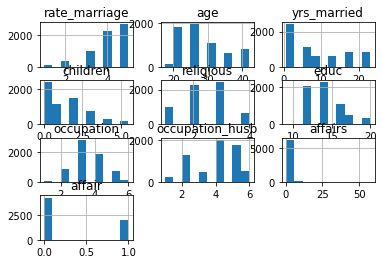

In [116]:
# plot all of the columns
%matplotlib inline
plt.figure(figsize=(20,18))
dta.hist()

In [117]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Split the data into training and test set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [118]:
#We will use the statsmodels Logit function for logistic regression
logit = sm.Logit(y_train, X_train)
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.539555
         Iterations 6


In [119]:
predictions = result.predict(X_test)
predictions

345     0.410392
5695    0.234616
4973    0.292189
796     0.182226
4199    0.253498
          ...   
1462    0.666290
2049    0.789632
4359    0.272101
2236    0.513822
5748    0.080356
Length: 1910, dtype: float64

In [120]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [121]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.1358
Time:                        12:55:26   Log-Likelihood:                -2404.3
converged:                       True   LL-Null:                       -2782.0
Covariance Type:            nonrobust   LLR p-value:                2.029e-150
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.7895      0.717      3.892      0.000       1.385       4.194
occ_2             0.6971      0.584      1.195      0.232      -0.447       1.841
occ_3             1.0100      0.576      1.752      0.080      -0.120       2.140
occ_4             0.7679      0.578      1.329      0.184      -0.364       1.900
occ_5             1.2799      0.582      2.199      0.028       0.139       2.421
occ_6             1.4863      0.636      2.337      0.019       0.240       2.733
occ_husb_2        0.1379      0.219      0.629      0.530      -0.292       0.568
occ_husb_3        0.3006      0.238      1.261      0.207      -0.166       0.768
occ_husb_4        0.1694      0.213      0.795      0.427      -0.248       0.587
occ_husb_5        0.2120      0.215      0.985      0.324      -0.210       0.634
occ_husb_6        0.2289      0.241      0.950      0.342      -0.243       0.701
rate_marriage    -0.7202      0.038    -19.112      0.000      -0.794      -0.646
age              -0.0577      0.012     -4.640      0.000      -0.082      -0.033
yrs_married       0.0951      0.013      7.186      0.000       0.069       0.121
children          0.0412      0.039      1.067      0.286      -0.035       0.117
religious        -0.3892      0.042     -9.269      0.000      -0.471      -0.307
educ             -0.0094      0.021     -0.444      0.657      -0.051       0.032
=================================================================================
"""

In [122]:
print("Logistic Regression with scikit-learn")
dta.head()


Logistic Regression with scikit-learn


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [123]:
print('Exploratary data analysis')
# people having affair is represented with 1 and not having affair is repres
dta.affair.value_counts()

Exploratary data analysis


0    4313
1    2053
Name: affair, dtype: int64

In [124]:
print("We can conclude that women who have affairs, rate their marriage lower")
dta.groupby('affair').mean()


We can conclude that women who have affairs, rate their marriage lower


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [125]:
print('Checking rate_marriage paramerter')
print('We can say with an increase in age, yrs_married and children correlate')
dta.groupby('rate_marriage').mean()


Checking rate_marriage paramerter
We can say with an increase in age, yrs_married and children correlate


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Lets visualize our data


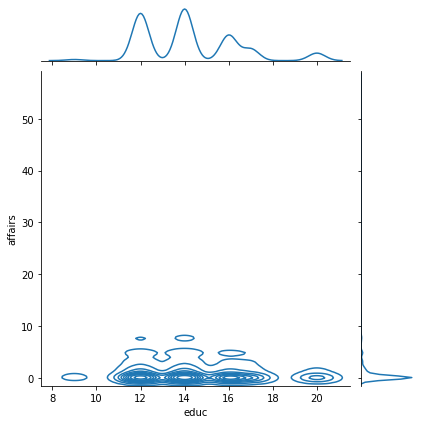

In [126]:
print('Lets visualize our data')
import seaborn as sns
sns.jointplot(x='educ',y='affairs',data=dta,kind='kde')


Text(0, 0.5, 'Frequency')

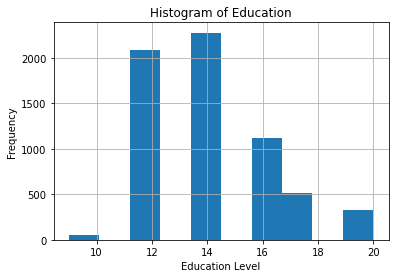

In [127]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

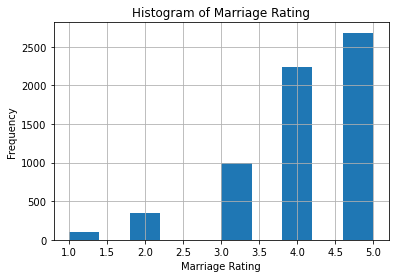

In [128]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

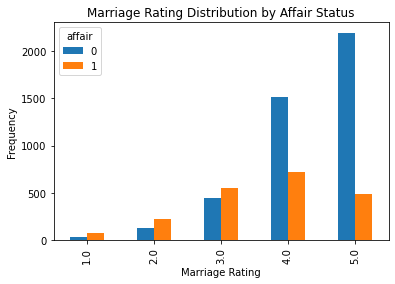

In [129]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

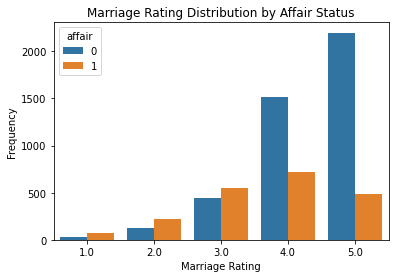

In [130]:
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

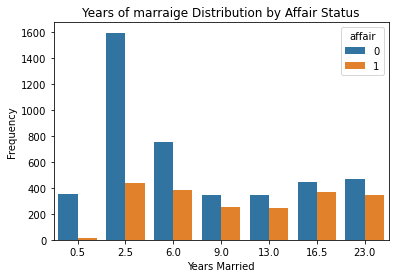

In [131]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

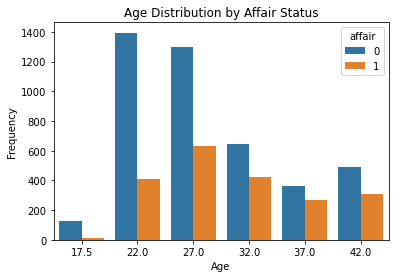

In [132]:
import seaborn as sns
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [133]:
print("Model Evaluation Using a Validation Set")
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Model Evaluation Using a Validation Set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [134]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [135]:
print(model.score(X_train,y_train))
print("Training set has 73% accuracy")

0.723967684021544
Training set has 73% accuracy


In [136]:
print("Use the test data set to predict the class / labels")
# predict class labels for the test set
predicted = model.predict(X_test)
predicted

Use the test data set to predict the class / labels


array([0., 0., 0., ..., 1., 0., 0.])

In [137]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs


array([[0.81676235, 0.18323765],
       [0.68914119, 0.31085881],
       [0.82369233, 0.17630767],
       ...,
       [0.41255832, 0.58744168],
       [0.82531199, 0.17468801],
       [0.82753321, 0.17246679]])

In [138]:
print('Evaluating the model')
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print("The accuracy of the model is 73% similar to the training data.")

Evaluating the model
0.7261780104712042
0.7347906503858909
The accuracy of the model is 73% similar to the training data.


In [140]:
#accuracy report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82      1306
         1.0       0.63      0.33      0.43       604

    accuracy                           0.73      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.71      0.73      0.70      1910



In [141]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted)
type(cf)


numpy.ndarray

In [142]:
cf.shape

(2, 2)

In [143]:
#Calculation of Precision Recall and F1 score
TN = cf[0,0] #True Negative
FP = cf[0,1] #False Positive
FN = cf[1,0] #False Negative
TP = cf[1,1] #True Positive
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))

Precision : 0.6269592476489029 , Recall : 0.33112582781456956, F1 : 0.4333694474539545


In [144]:
#Calculation of True Positive Rate and False Positive Rate
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))

True Positive Rate : 0.33112582781456956, False Positive Rate : 0.09111791730474732


In [145]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy')
scores, scores.mean()

(array([0.70957614, 0.72113119, 0.72034564, 0.717989  , 0.75019639]),
 0.7238476706774316)

In [146]:
print('Predicting the Probability of an Affair')
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]])))
print('The predicted probability of an affair is 23%')


Predicting the Probability of an Affair
[[0.68218758 0.31781242]]
The predicted probability of an affair is 23%


In [147]:
# Let's predict the probability of an affair for a random woman not present
# She's a 30-year-old teacher who graduated college, has been married for 10
# as strongly religious, rates her marriage as fair, and her husband is a fair, and her husband is a farmer
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]])))
print('The predicted probability of an affair is 23%')


[[0.68218758 0.31781242]]
The predicted probability of an affair is 23%
